##### Grading Feedback Cell

# IST 718: Big Data Analytics

- Professor: Willard Williamson <wewillia@syr.edu>
- Faculty Assistant: Vidushi Mishra <vmishr01@syr.edu>
- Faculty Assistant: Pranav Kottoli Radhakrishna <pkottoli@syr.edu>
## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers from your classmates.  Short code snippets are allowed from the internet.  Code from the class text books or class provided code can be copied in its entirety.__
- There could be tests in some cells (i.e., `assert` and `np.testing.` statements). These tests (if present) are used to grade your answers. **However, the professor and FAs could use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before submitting your work, remember to check for run time errors with the following procedure:
`Kernel`$\rightarrow$`Restart and Run All`.  All runtime errors will result in a minimum penalty of half off.
- Data Bricks is the official class runtime environment so you should test your code on Data Bricks before submission.  If there is a runtime problem in the grading environment, we will try your code on Data Bricks before making a final grading decision.
- All plots shall include descriptinve title and axis labels.  Plot legends shall be included where possible.  Unless stated otherwise, plots can be made using any Python plotting package.  It is understood that spark data structures must be converted to something like numpy or pandas prior to making plots.  All required mathematical operations, filtering, selection, etc., required by a homework question shall be performed in spark prior to converting to numpy or pandas.
- Grading feedback cells are there for graders to provide feedback to students.  Don't change or remove grading feedback cells.
- Don't add or remove files from your git repo.
- Do not change file names in your repo.  This also means don't change the title of the ipython notebook.
- You are free to add additional code cells around the cells marked `your code here`.
- We reserve the right to take points off for operations that are extremely inefficient or "heavy weight".  This is a big data class and extremely inefficient operations make a big difference when scaling up to large data sets.  For example, the spark dataframe collect() method is a very heavy weight operation and should not be used unless it there is a real need for it.  An example where collect() might be needed is to get ready to make a plot after filtering a spark dataframe.
- import * is not allowed because it is considered a very bad coding practice and in some cases can result in a significant delay (which slows down the grading process) in loading imports.  For example, the statement `from sympy import *` is not allowed.  You must import the specific packages that you need.
- If you perform databricks specific operations, you MUST protect those operations in an if statement by calling the is_databricks() function provided in all homework assignments.  For example, if you use dbutils (databricks utilities), only run dbutils commands if is_databricks() returns true.  Runtime errors created in the grading environment by not protecting databricks specific commands in an if statement will result in a runtime error points deduction. 
- The graders reserve the right to deduct points for subjective things we see with your code.  For example, if we ask you to create a pandas data frame to display values from an investigation and you hard code the values, we will take points off for that.  This is only one of many different things we could find in reviewing your code.  In general, write your code like you are submitting it for a code peer review in industry.  
- Level of effort is part of our subjective grading.  Oftentimes there is a large disparity between the level of effort between students who are trying learn, and students who are trying to do the minimum possible to check off an assignment requirement.  For example, in cases where we ask for a more open ended investigation, some students put in significant effort and some students do the minimum possible to meet requirements.  In these cases, we may take points off for students who did not put in much effort as compared to students who did put in a lot of effort.  We feel that the students who did a better job deserve a better grade.  We reserve the right to invoke level of effort grading at any time.
- Only use spark, spark machine learning, spark data frames, RDD's, and map reduce to solve all problems unless instructed otherwise.
- Unless code is provided which reads data files, __you must use the get_training_filename function povided below to read data files."  Runtime errors encountered while grading caused by students not using get_training_filename will result in a minimum of half points off for the problem in question.__

In [ ]:
%%bash

# Need to install pyspark
# if pyspark is already installed, will print a message indicating pyspark already isntalled
pip install pyspark

# Download tweets.csv from github
# If the tweets.csv file does not exist in the colab environment
if [[ ! -f ./tweets.csv ]]; then 
   # download tweets.csv file from github and save it in this colab environment instance
   wget https://raw.githubusercontent.com/wewilli1/ist718_data/master/tweets.csv   
fi

# vefify tweets.csv exits in the colab env - should not print an error message
ls tweets.csv

  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=cc3c8e00ca48560e68294c9fd07420279a7584f2ed280f4d5ed8fabf4d57ab2e
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built pyspark
tweets.csv


--2020-10-21 03:49:12--  https://raw.githubusercontent.com/wewilli1/ist718_data/master/tweets.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13727793 (13M) [text/plain]
Saving to: ‘tweets.csv’

     0K .......... .......... .......... .......... ..........  0% 2.28M 6s
    50K .......... .......... .......... .......... ..........  0% 5.21M 4s
   100K .......... .......... .......... .......... ..........  1% 14.4M 3s
   150K .......... .......... .......... .......... ..........  1% 6.30M 3s
   200K .......... .......... .......... .......... ..........  1% 12.0M 2s
   250K .......... .......... .......... .......... ..........  2% 8.22M 2s
   300K .......... .......... .......... .......... ..........  2% 11.3M 2s
   350K .......... .......... .......... .

In [ ]:
# import statements
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [ ]:
# example code to read the downloaded tweets.csv file on colab
tweets_df = spark.read.format("csv").option("header", "true").load("tweets.csv")
tweets_df.take(5)

[Row(target='4', id='1467822272', date='Mon Apr 06 22:22:45 PDT 2009', flag='NO_QUERY', user='ersle', text='I LOVE @Health4UandPets u guys r the best!! '),
 Row(target='4', id='1467822273', date='Mon Apr 06 22:22:45 PDT 2009', flag='NO_QUERY', user='becca210', text='im meeting up with one of my besties tonight! Cant wait!!  - GIRL TALK!!'),
 Row(target='4', id='1467822283', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='Wingman29', text='@DaRealSunisaKim Thanks for the Twitter add, Sunisa! I got to meet you once at a HIN show here in the DC area and you were a sweetheart. '),
 Row(target='4', id='1467822287', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='katarinka', text='Being sick can be really cheap when it hurts too much to eat real food  Plus, your friends make you soup'),
 Row(target='4', id='1467822293', date='Mon Apr 06 22:22:46 PDT 2009', flag='NO_QUERY', user='_EmilyYoung', text='@LovesBrooklyn2 he has that effect on everyone ')]

What problems did you have with colab?  Your comments here:
There are certainly some issues with the interface and some functions do not work exactly the way I want it to be. But for the purpose of getting the homework done, I definitely prefer colab than databricks.

# Sentiment Analysis
In this assignment, you will use the tweets.csv file to perform sentiment analysis. The tweets.csv file contains the following columns:
- target: the polarity of the tweet (0 = negative, 4 = positive)
- ids: The id of the tweet ( 2087)
- date: the date of the tweet (Sat May 16 23:58:44 UTC 2009)
- flag: The query (lyx). If there is no query, then this value is NO_QUERY.
- user: the user that tweeted (robotickilldozr)
- text: the text of the tweet (Lyx is cool)

# Qustion 1: (10 pts)
Read tweets.csv into a spark dataframe named `tweets_df`.  Solutions that do not use `get_training_filename` will be heavily penalized.  Drop all columns except target and text.  Transform the target column such that a negative sentiment is equal to 0 and a positive sentiment is equal to 1.  Determine and print the percentage of positive and negative tweets in the dataframe such that it's easy for the graders to find and interpret your data.

In [ ]:
# your code here

from pyspark.sql.functions import *
from pyspark.sql.types import IntegerType

tweets_df = spark.read.format("csv").option("header", "true").load("tweets.csv")
columns_to_drop = ['id', 'date', 'flag', 'user']
tweets_df = tweets_df.drop(*columns_to_drop)

tweets_df = tweets_df.withColumn('target', regexp_replace('target', '4', '1'))
tweets_df = tweets_df.withColumn('target', tweets_df['target'].cast(IntegerType()))


In [ ]:
# grading cell do not modify
tweets_pd = tweets_df.toPandas()
display(tweets_pd.head())
print(tweets_pd.shape)

,target,text
0,1,I LOVE @Health4UandPets u guys r the best!!
1,1,im meeting up with one of my besties tonight! ...
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S..."
3,1,Being sick can be really cheap when it hurts t...
4,1,@LovesBrooklyn2 he has that effect on everyone


(100000, 2)


##### Grading Feedback Cell

# Question 2: (10 pts)
Pre-process the data by creating a pipeline named `tweets_pre_proc_pipe`. Your pipeline should tokenize, remove stop words, and do a TF-IDF transformation.  Fit and execute your pipeline, and create a new dataframe named `tweets_pre_proc_df`.  Print the shape of the resulting TF-IDF data such that it's easy for the graders to find and understand as num rows x num words. Based on the shape of the TF-IDF data, would you expect a logistic regression model to overfit?

In [ ]:
# your code here
from pyspark.ml import Pipeline
from pyspark.ml.feature import Tokenizer
from pyspark.ml.feature import CountVectorizer
import requests
from pyspark.ml.feature import StopWordsRemover
from pyspark.ml.feature import IDF

stop_words = requests.get('http://ir.dcs.gla.ac.uk/resources/linguistic_utils/stop_words').text.split()

tokenizer = Tokenizer().setInputCol('text').setOutputCol('words')

sw_filter = StopWordsRemover()\
  .setStopWords(stop_words)\
  .setCaseSensitive(False)\
  .setInputCol("words")\
  .setOutputCol("filtered")

cv = CountVectorizer(minTF=1., minDF=5., vocabSize=2**17)\
  .setInputCol("filtered")\
  .setOutputCol("tf")

idf = IDF()\
  .setInputCol('tf')\
  .setOutputCol('tfidf')


cv_pipeline = Pipeline(stages=[tokenizer, sw_filter, cv]).fit(tweets_df)
tweets_pre_proc_pipe = Pipeline(stages=[cv_pipeline, idf]).fit(tweets_df)
tweets_pre_proc_df = tweets_pre_proc_pipe.transform(tweets_df)

In [ ]:
print('number of rows =',tweets_pre_proc_df.count())
temp_df = tweets_pre_proc_df.toPandas()
print('number of words =',temp_df['tfidf'].iloc[0].size)

number of rows = 100000
number of words = 13693


In [ ]:
# grading cell do not modify
display(tweets_pre_proc_df.toPandas().head())

,target,text,words,filtered,tf,tfidf
0,1,I LOVE @Health4UandPets u guys r the best!!,"[i, love, @health4uandpets, u, guys, r, the, b...","[love, @health4uandpets, u, guys, r, best!!]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1,im meeting up with one of my besties tonight! ...,"[im, meeting, up, with, one, of, my, besties, ...","[im, meeting, besties, tonight!, wait!!, , -, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","(1.1265280578718189, 0.0, 0.0, 0.0, 0.0, 3.183..."
2,1,"@DaRealSunisaKim Thanks for the Twitter add, S...","[@darealsunisakim, thanks, for, the, twitter, ...","[@darealsunisakim, thanks, twitter, add,, suni...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1,Being sick can be really cheap when it hurts t...,"[being, sick, can, be, really, cheap, when, it...","[sick, really, cheap, hurts, eat, real, food, ...","(1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(1.1265280578718189, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,1,@LovesBrooklyn2 he has that effect on everyone,"[@lovesbrooklyn2, he, has, that, effect, on, e...","[@lovesbrooklyn2, effect]","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Your explanation here: 
I think if we build a logistic regression with the tf-idf data, it will not be overfitting, even if it does, it should not be closely related to the shape of the tf-idf data. Beacause we have 13693 features for the model to train on, comparing to the total instances of the data, which is 100000. The variance of a regression model is proportional to the number of features in the training data, if we have more features than the instances of the training data, the model might be overfitting.

##### Grading Feedback Cell

# Question 3: (10 pts)
Since IDF considers a word's frequency across all documents in a corpus, you can use IDF as a form of inference.  Examine the documentation for the spark ML object that you used to create TF-IDF scores and learn how to extract the IDF scores for words in the corpus.  Create a pandas dataframe containing the 5 most important IDF scores named `most_imp_idf`.  Create another pandas dataframe containing the 5 least important IDF scores named `least_imp_idf`.  Each dataframe shall have 2 columns named `word` and `idf_score`.  Explain in words your interpretation of what the IDF scores mean.

In [ ]:
# your code here
import pandas as pd
vocabulary = tweets_pre_proc_pipe.stages[0].stages[-1].vocabulary

In [ ]:
idf_scores = tweets_pre_proc_pipe.stages[-1].idf.values.tolist()

max_idf_val = sorted(idf_scores)[-1]
indices = [i for i, x in enumerate(idf_scores) if x == max_idf_val]

word = []
for i in indices:
  word.append(vocabulary[i])

max_idf = [max_idf_val]*len(word)
max_imp_idf = pd.DataFrame(list(zip(word, max_idf)), columns =['word', 'idf_score'])

max_imp_idf

,word,idf_score
0,tsk,9.721176
1,but..,9.721176
2,thks,9.721176
3,x(,9.721176
4,ve,9.721176
...,...,...
2080,pet.,9.721176
2081,@snarkattack,9.721176
2082,chidambaram,9.721176
2083,@milliemagsaysay,9.721176


In [ ]:
least_5_idf_values = sorted(idf_scores)[:5]

least_5_idf_tokens = []
for i in least_5_idf_values:
  least_5_idf_tokens.append(idf_scores.index(i))

word = []
for i in least_5_idf_tokens:
  word.append(vocabulary[i])

least_imp_idf = pd.DataFrame(list(zip(word, least_5_idf_values)), columns =['word', 'idf_score'])

least_imp_idf

,word,idf_score
0,,1.126528
1,just,2.588812
2,i'm,2.645649
3,good,3.015945
4,like,3.113850


Your explanation here: 
The idf values is calculated by total number of documents / number of documents with a specific word in it. Since the totoal number of documents is a constant (in our case, 100000), less frequently appeared words would have larger idf scores. By doing so, when we are calculating the tfidf value using tf*idf, we are discounting those words that appear more frequently in more documents by the idf score. 

##### Grading Feedback Cell

# Question 4: (10 pts)
Create a new recursive pipeline named `lr_pipe` which starts with `tweets_pre_proc_pipe` and adds a logistic regression model using default hyper parameters.  Fit lr_pipe using `tweets_df`.  Score the model using ROC AUC.  Report the resulting AUC such that it is easy for graders to find and interpret.

In [ ]:
# your code here
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

train_df, test_df = tweets_df.randomSplit([0.7, 0.3], seed=0)

lr = LogisticRegression().\
    setLabelCol('target').\
    setFeaturesCol('tfidf')

lr_pipeline = Pipeline(stages=[tweets_pre_proc_pipe, lr]).fit(train_df)

evaluator = BinaryClassificationEvaluator(labelCol='target')
evaluator.evaluate(lr_pipeline.transform(test_df))
    

0.7451840999127445

##### Grading Feedback Cell

# Question 5: (10 pts)
Create 2 pandas dataframes named `lr_pipe_df_neg` and `lr_pipe_df_pos`which contain 2 colunms: `word` and `score`.  Load the 2 dataframes with the top 10 words and logistic regression coefficients that contribute the most to negative and positive sentiments respectively. Analyze the 2 dataframes and describe if the words make sense.  Do the words look like they are really negative and positive?

In [ ]:
# your code here
score = lr_pipeline.stages[-1].coefficients.toArray()
coeffs_df = pd.DataFrame({'word': tweets_pre_proc_pipe.stages[0].stages[-1].vocabulary, 'score': score})
lr_pipe_df_neg = coeffs_df[coeffs_df.score < 0]
lr_pipe_df_pos = coeffs_df[coeffs_df.score > 0]

lr_pipe_df_neg.sort_values('score').head(10)

,word,score
13596,hope?,-9.467643
8380,selfish,-6.744463
11065,painfully,-6.258878
13691,@milliemagsaysay,-5.939989
12955,dec,-5.199164
12560,re.,-5.120213
12541,crummy,-4.793909
10360,why'd,-4.768670
12261,saddened,-4.748368
6770,pirates,-4.690658


In [ ]:
lr_pipe_df_pos.sort_values('score', ascending=False).head(10)

,word,score
7474,reunion,6.487646
10570,pizza?,5.991345
9459,lotr,5.710805
9732,"tweeps,",5.456466
9780,interactive,5.447157
9930,ride!,5.346156
6462,romantic,5.248715
12170,peek,4.704929
11677,th?,4.628680
7092,hob,4.527096


In [ ]:
# grading cell - do not modify
display(lr_pipe_df_neg)
display(lr_pipe_df_pos)

,word,score
0,,-0.168379
2,i'm,-0.023807
6,it's,-0.103550
8,day,-0.089533
9,got,-0.109349
...,...,...
13686,@anistorm,-1.229415
13688,pet.,-1.684006
13690,chidambaram,-0.495094
13691,@milliemagsaysay,-5.939989


,word,score
1,just,0.067518
3,good,0.418421
4,like,0.006771
5,-,0.170402
7,going,0.022431
...,...,...
13682,that:,0.034066
13684,beach..,0.273839
13685,fc,0.049439
13687,matthews,0.014327


Your explanation here:
While some of the words can relate to positive or negative sentiments (e.g. "saddened", "painfully"), the majority of the words in the above dataframes do not look very positive or negative.

##### Grading Feedback Cell

# Question 6a: (5 pts)
The goal of this question is to try to improve the score from question 4 using a regularization grid search on a new pipeline named `lr_pipe_1`. lr_pipe_1 is the same as lr_pipe above but we would like you to create a new pipe for grading purposes only.  I'm not sure if it's possible to increase the score or not.  You will be graded on level of effort to increase the score in relation to other students in the class.  All of your grid search code should be inside the `if enable_grid` statement in the cell below.  The enable_grid boolean is set to true in a grading cell above.  If any of the grid search code executes outside of the if statement, you will not get full credit for the question.  We want the ability to turn off the grid search during grading.<br>

In [ ]:
import numpy as np

In [ ]:
enable_grid = True

In [ ]:
# your grid search (and only your grid search) code here
from pyspark.ml.tuning import ParamGridBuilder

lr_estimator = Pipeline(stages=[tweets_pre_proc_pipe, lr])

if enable_grid:
    # your grid search code here
    grid = ParamGridBuilder().\
        addGrid(lr.regParam, [0., 0.01, 0.02]).\
        addGrid(lr.elasticNetParam, [0., 0.2, 0.4]).\
        build()
    
    all_models = []
    for j in range(len(grid)):
      lr_pipe_1 = lr_estimator.fit(train_df, grid[j])
      all_models.append(lr_pipe_1)

    all_auc = []
    for m in all_models:
      all_auc.append(evaluator.evaluate(m.transform(test_df)))
    
    best_model_idx = np.argmax(all_auc)
    print("best model index =", best_model_idx)
    print(grid[best_model_idx])
    print(all_auc[best_model_idx])

    pass

best model index = 4
{Param(parent='LogisticRegression_e328183e6ab0', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_e328183e6ab0', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.2}
0.8195032060417455


##### Grading feedback cell

# Question 6b (5 pts)
Build a new pipeline named `lr_pipe_2` which uses the optimized model parameters from the grid search in question 6a above (the best model).  Create 2 variables named alpha and lambda and assign to them the best alpha and lambda produced by the grid search by hard coding the values. Fit and transform lr_pipe_2.  Compare AUC scores between lr_pipe_2 with lr_pipe in question 4.  Create a pandas dataframe named `comapre_1_df` which encapsulates the comparison data.  comapre_1_df Shall have 2 columns: `model_name` and `auc_score`.

In [ ]:
# your optimized model code here

alpha = 0.2
lamb = 0.01

# lr_pipe_2 code here

lr_2 = LogisticRegression().\
    setLabelCol('target').\
    setFeaturesCol('tfidf').\
    setRegParam(lamb).\
    setMaxIter(100).\
    setElasticNetParam(alpha)

lr_pipe_2 = Pipeline(stages=[tweets_pre_proc_pipe, lr_2]).fit(train_df)

lr_2_auc = evaluator.evaluate(lr_pipe_2.transform(test_df))
lr_auc = evaluator.evaluate(lr_pipeline.transform(test_df))

model_name = ['lr_default','lr_opt']
auc_score = [lr_auc, lr_2_auc]
compare_1_df = pd.DataFrame(list(zip(model_name, auc_score)), columns =['model_name', 'auc_score'])


In [ ]:
# grading cell - do not modify
display(compare_1_df)

,model_name,auc_score
0,lr_default,0.745187
1,lr_opt,0.819501


##### Grading Feedback Cell

# Question 7 (10 pts)
Perform inference on lr_pipe_2.  Write code to report how many words were eliminated from the best model in question 6b above (if any) as compared to the model in question 4 above.  Make sure your output is easy for the graders to find and interpret.

In [ ]:
# your code here

lr_2_weights = lr_pipe_2.stages[-1].coefficients.toArray()
lr_2_coeffs_df = pd.DataFrame({'word': vocabulary, 'weight': lr_2_weights})

num_no_weight_words_2 = len(lr_2_coeffs_df.query('weight == 0.0'))
num_no_weight_words_2

9337

In [ ]:
num_no_weight_words = len(coeffs_df.query('score == 0.0'))

print(num_no_weight_words_2-num_no_weight_words, "more words are eliminated from the optimized model than the default model")

9331 more words are eliminated from the optimized model than the default model


##### Grading Feedback Cell

# Question 8 (10 pts)
Perform the same inference analysis that you did in question 5 but name the data frames `lr_pipe_df_neg_1` and `lr_pipe_df_pos_1`.  Compare the word importance results with the results in question 5.

In [ ]:
# your code here
lr_pipe_df_neg_1 = lr_2_coeffs_df[lr_2_coeffs_df.weight < 0]
lr_pipe_df_pos_1 = lr_2_coeffs_df[lr_2_coeffs_df.weight > 0]

lr_pipe_df_neg_1.sort_values('weight').head(10)

,word,weight
55,sad,-0.508234
169,poor,-0.376475
35,miss,-0.367589
171,missing,-0.354671
37,wish,-0.350972
95,sick,-0.339820
557,lonely,-0.336134
300,hurts,-0.331137
573,sad.,-0.328362
258,sucks,-0.320605


In [ ]:
lr_pipe_df_pos_1.sort_values('weight', ascending=False).head(10)

,word,weight
29,thanks,0.337036
69,thank,0.296992
230,welcome,0.285944
12576,weights,0.283520
10970,owners,0.268473
3,good,0.256038
1059,proud,0.242018
7092,hob,0.239991
46,happy,0.239530
4788,peaceful,0.234488


In [ ]:
# grading cell - do not modify
display(lr_pipe_df_neg_1)
display(lr_pipe_df_pos_1)

,word,weight
0,,-0.061240
2,i'm,-0.007866
6,it's,-0.034158
8,day,-0.038860
9,got,-0.058676
...,...,...
13681,ebay.,-0.059349
13686,@anistorm,-0.063927
13688,pet.,-0.097605
13691,@milliemagsaysay,-0.146155


,word,weight
1,just,0.018627
3,good,0.256038
5,-,0.111182
11,love,0.228144
18,new,0.118655
...,...,...
13662,sequel,0.038540
13663,restaurant.,0.017350
13669,cracker,0.045965
13679,#cloudforce,0.014400


##### Grading Feedback Cell

Your explanation here:
The most postive and negative words given b the optimized model makes more sense. Most of the words given do agree with what humans intepret as positive or negative words used to express sentiments. It is also worth noticing that the weights of the most positive and negative words are much smaller (to be more precise, closer to 0) than what's given by the default model.

##### Grading Feedback Cell

# Question 9 (10 pts)
Create a receiver operating characteristic (ROC) plot for the best model in question 6.  Briefly describe in words the high level steps needed to build a ROC curve as outlined in lecture.  Convince me you understand the high level steps needed to make a ROC curve.

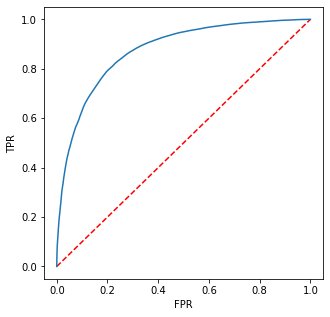

In [ ]:
# your code here
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(lr_pipe_2.stages[-1].summary.roc.select('FPR').collect(),
         lr_pipe_2.stages[-1].summary.roc.select('TPR').collect())
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Your explanation here:
The roc curve is plotted using the true positive rates (tpr) v.s. the false positive rate (fpr) for different cutoff points. Both tpr and fpr can be derived from the confusion matrix. After we obtain the tpr and fpr for each cutoff point, we can plot tpr vs fpr and connect the scatter plot with a smooth curve, and that will become our roc curve.

##### Grading Feedback Cell

# Question 10 (10 pts)
Learn about [precision/recall](https://en.wikipedia.org/wiki/Precision_and_recall) curves. Using the logistic regression summary object contained in the linear regression object within lr_pipe_2, create a precision recall plot. Similar to the `roc` object which is available in the logistic regression summary, there is a `pr` object which can be used to help create a precision / recall curve.  Note that the precision recall curve is built using the same high level methodology as the ROC curve, but using different metrics calculated from the confusion matrix.  If you understand how a ROC curve is built, you understand how a precision / recall curve is built.  Compare and contrast the differences between precision / recall and ROC curves.  What axis is common and what axis is different between the 2 curves?

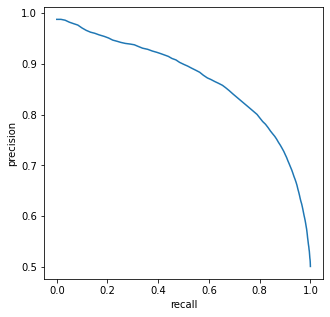

In [ ]:
# your code here
plt.figure(figsize=(5,5))

plt.plot(lr_pipe_2.stages[-1].summary.pr.select('recall').collect(),
         lr_pipe_2.stages[-1].summary.pr.select('precision').collect())
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

Your explanation here:
As stated in the name, the precision/recall curve is calculated by plotting precision v.s. recall for different cutoff points. Precision is calculated as TP/(TP+FP), and Recall is TP/(TP+FN) which is the same as the true positive rate. The PRC is usually used when the data is imbalanced with the majority of data points lie in the negative class. Because PRC does not include true negative in any part of the calculation.

##### Grading Feedback Cell